# Продвинутая статистика на python

## Домашняя работа

In [41]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import io
import requests
import seaborn as sns

%matplotlib inline


Таблица цен на дома в Бостоне.

Основные значения:

*    ***CRIM:*** This is the per capita crime rate by town
*    ***ZN:*** This is the proportion of residential land zoned for lots larger than 25,000 sq.ft.    
*    ***INDUS:*** This is the proportion of non-retail business acres per town.
*    ***CHAS:*** This is the Charles River dummy variable (this is equal to 1 if tract bounds river; 0 otherwise)
*    ***NOX:*** This is the nitric oxides concentration (parts per 10 million)
*    ***RM:*** This is the average number of rooms per dwelling
*    ***AGE:*** This is the proportion of owner-occupied units built prior to 1940
*    ***DIS:*** This is the weighted distances to five Boston employment centers
*    ***RAD:*** This is the index of accessibility to radial highways
*    ***TAX:*** This is the full-value property-tax rate per 10,000 dollars
*    ***PTRATIO:*** This is the pupil-teacher ratio by town
*    ***B:*** This is calculated as 1000(Bk — 0.63)², where Bk is the proportion of people of African American descent by town
*    ***LSTAT:*** This is the percentage lower status of the population
*    ***MEDV:*** This is the median value of owner-occupied homes in 1000 dollars



In [42]:
import ssl
# следующая строчка подключает сертификат для защищенного соединения
ssl._create_default_https_context = ssl._create_unverified_context
url='http://yustiks.ru/dataset/housing.csv'
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data=pd.read_csv(url,  delim_whitespace=True, names=names)
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


#### 1. Нарисовать частотные графики для всех значений. Можете ли вы найти следующие распределения в данных графиках?

*    ***Нормальное*** - RM
*    ***Равномерное*** - NOX
*    ***Биноминальное*** - LSTAT
*    ***Бернулли*** - CHAS
*    ***Геометрическое*** -CRIM
*    ***Логнормальное*** - DIS



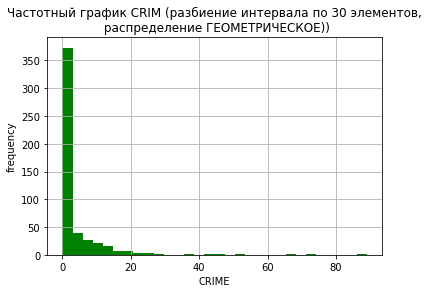

In [43]:
# 1. Частотный график для CRIM
n, bins, patches = plt.hist(data['CRIM'], 30, facecolor='g')

plt.xlabel('CRIME')
plt.ylabel('frequency')
plt.title('Частотный график CRIM (разбиение интервала по 30 элементов,\n распределение ГЕОМЕТРИЧЕСКОЕ))')
plt.grid(True)
plt.show()

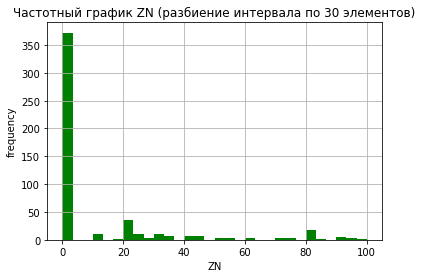

0

In [44]:
# 2. Частотный график для ZN
n, bins, patches = plt.hist(data['ZN'], 30, facecolor='g')

plt.xlabel('ZN')
plt.ylabel('frequency')
plt.title('Частотный график ZN (разбиение интервала по 30 элементов)')
plt.grid(True)
plt.show()

#проверка отсутствующих значений в колонке Freedom
data.ZN.isnull().sum()

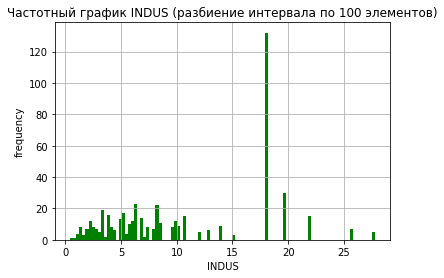

In [148]:
# 3. Частотный график для INDUS
n, bins, patches = plt.hist(data['INDUS'], 100, facecolor='g')

plt.xlabel('INDUS')
plt.ylabel('frequency')
plt.title('Частотный график INDUS (разбиение интервала по 100 элементов)')
plt.grid(True)
plt.show()

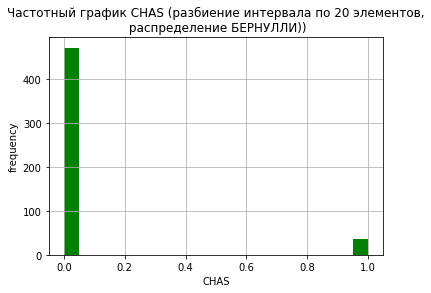

In [153]:
# 4. Частотный график для CHAS
n, bins, patches = plt.hist(data['CHAS'], 20, facecolor='g')

plt.xlabel('CHAS')
plt.ylabel('frequency')
plt.title('Частотный график CHAS (разбиение интервала по 20 элементов,\n распределение БЕРНУЛЛИ))')
plt.grid(True)
plt.show()

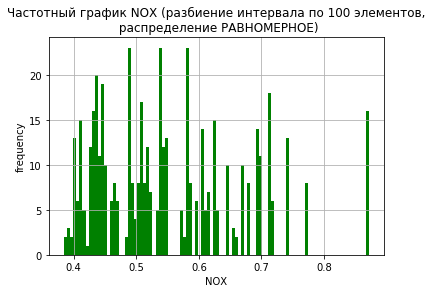

In [155]:
# 5. Частотный график для NOX
n, bins, patches = plt.hist(data['NOX'], 100, facecolor='g')

plt.xlabel('NOX')
plt.ylabel('frequency')
plt.title('Частотный график NOX (разбиение интервала по 100 элементов,\n распределение РАВНОМЕРНОЕ)')
plt.grid(True)
plt.show()

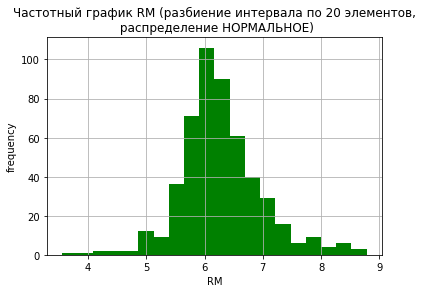

In [156]:
# 6. Частотный график для RM
n, bins, patches = plt.hist(data['RM'], 20, facecolor='g')

plt.xlabel('RM')
plt.ylabel('frequency')
plt.title('Частотный график RM (разбиение интервала по 20 элементов,\n распределение НОРМАЛЬНОЕ)')
plt.grid(True)
plt.show()


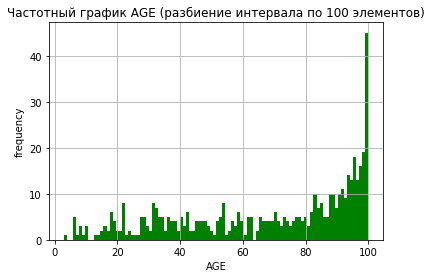

In [157]:
# 7. Частотный график для AGE
n, bins, patches = plt.hist(data['AGE'], 100, facecolor='g')

plt.xlabel('AGE')
plt.ylabel('frequency')
plt.title('Частотный график AGE (разбиение интервала по 100 элементов)')
plt.grid(True)
plt.show()

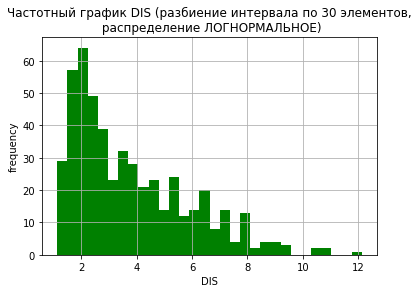

In [158]:
# 8. Частотный график для DIS
n, bins, patches = plt.hist(data['DIS'], 30, facecolor='g')

plt.xlabel('DIS')
plt.ylabel('frequency')
plt.title('Частотный график DIS (разбиение интервала по 30 элементов,\n распределение ЛОГНОРМАЛЬНОЕ)')
plt.grid(True)
plt.show()

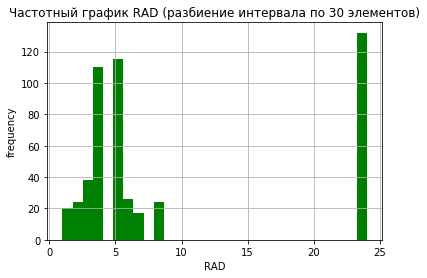

In [105]:
# 9. Частотный график для RAD
n, bins, patches = plt.hist(data['RAD'], 30, facecolor='g')

plt.xlabel('RAD')
plt.ylabel('frequency')
plt.title('Частотный график RAD (разбиение интервала по 30 элементов)')
plt.grid(True)
plt.show()

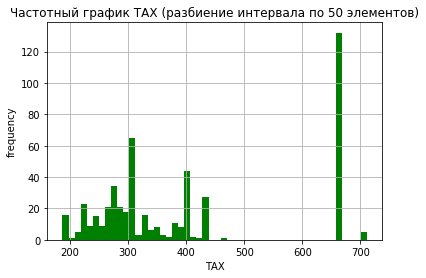

In [129]:
# 10. Частотный график для TAX
n, bins, patches = plt.hist(data['TAX'], 50, facecolor='g')

plt.xlabel('TAX')
plt.ylabel('frequency')
plt.title('Частотный график TAX (разбиение интервала по 50 элементов)')
plt.grid(True)
plt.show()

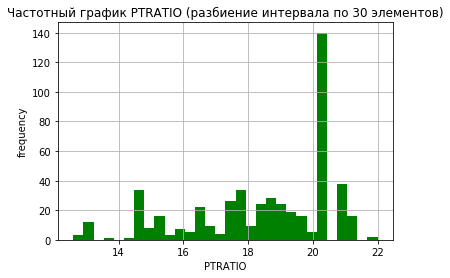

In [159]:
# 11. Частотный график для PTRATIO
n, bins, patches = plt.hist(data['PTRATIO'], 30, facecolor='g')

plt.xlabel('PTRATIO')
plt.ylabel('frequency')
plt.title('Частотный график PTRATIO (разбиение интервала по 30 элементов)')
plt.grid(True)
plt.show()

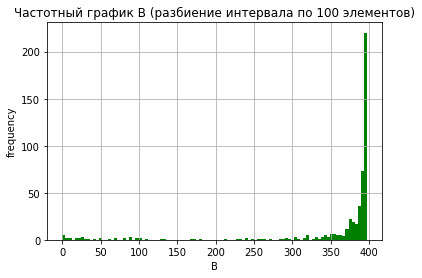

In [160]:
# 12. Частотный график для B
n, bins, patches = plt.hist(data['B'], 100, facecolor='g')

plt.xlabel('B')
plt.ylabel('frequency')
plt.title('Частотный график B (разбиение интервала по 100 элементов)')
plt.grid(True)
plt.show()

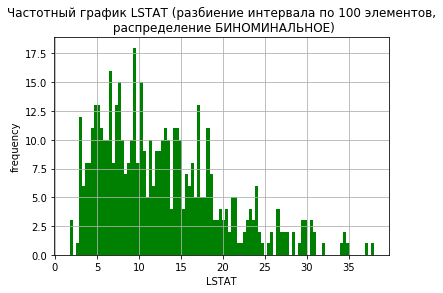

In [162]:
# 13. Частотный график для LSTAT
n, bins, patches = plt.hist(data['LSTAT'], 100, facecolor='g')

plt.xlabel('LSTAT')
plt.ylabel('frequency')
plt.title('Частотный график LSTAT (разбиение интервала по 100 элементов,\n распределение БИНОМИНАЛЬНОЕ)')
plt.grid(True)
plt.show()

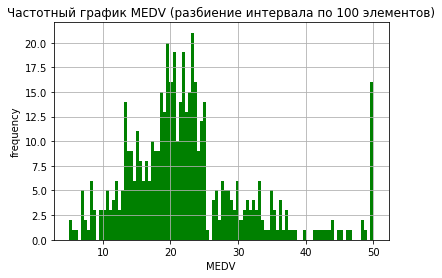

In [164]:
# 14. Частотный график для MEDV
n, bins, patches = plt.hist(data['MEDV'], 100, facecolor='g')

plt.xlabel('MEDV')
plt.ylabel('frequency')
plt.title('Частотный график MEDV (разбиение интервала по 100 элементов)')
plt.grid(True)
plt.show()

#### 2. Построить матрицу корреляций для данной таблицы и выбрать максимально коррелирующий атрибут (несколько атрибутов) с ценой на дома (MEDV атрибут).

In [46]:
corr = data.corr()
fig=plt.gcf()
fig.set_size_inches(10, 10)
corr.style.background_gradient(cmap='RdYlGn').set_precision(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1,-0.2,0.41,-0.056,0.42,-0.22,0.35,-0.38,0.63,0.58,0.29,-0.39,0.46,-0.39
ZN,-0.2,1,-0.53,-0.043,-0.52,0.31,-0.57,0.66,-0.31,-0.31,-0.39,0.18,-0.41,0.36
INDUS,0.41,-0.53,1,0.063,0.76,-0.39,0.64,-0.71,0.6,0.72,0.38,-0.36,0.6,-0.48
CHAS,-0.056,-0.043,0.063,1,0.091,0.091,0.087,-0.099,-0.0074,-0.036,-0.12,0.049,-0.054,0.18
NOX,0.42,-0.52,0.76,0.091,1,-0.3,0.73,-0.77,0.61,0.67,0.19,-0.38,0.59,-0.43
RM,-0.22,0.31,-0.39,0.091,-0.3,1,-0.24,0.21,-0.21,-0.29,-0.36,0.13,-0.61,0.7
AGE,0.35,-0.57,0.64,0.087,0.73,-0.24,1,-0.75,0.46,0.51,0.26,-0.27,0.6,-0.38
DIS,-0.38,0.66,-0.71,-0.099,-0.77,0.21,-0.75,1,-0.49,-0.53,-0.23,0.29,-0.5,0.25
RAD,0.63,-0.31,0.6,-0.0074,0.61,-0.21,0.46,-0.49,1,0.91,0.46,-0.44,0.49,-0.38
TAX,0.58,-0.31,0.72,-0.036,0.67,-0.29,0.51,-0.53,0.91,1,0.46,-0.44,0.54,-0.47


<Figure size 720x720 with 0 Axes>

In [339]:
# максимально коррелирующие аттрибуты с ценой на дома (MEDV атрибут): 
corr = corr[corr['MEDV']<1]
k1 = corr.MEDV.sort_values(ascending=False).reset_index().head(1)['index'][0]
k2 = corr.MEDV.sort_values(ascending=True).reset_index().head(1)['index'][0]

print('Максимально коррелирующие аттрибуты с ценой на дома (MEDV атрибут):')
print(f'{k1} (коэффициент корреляции Пирсона равен {round(corr.MEDV.sort_values(ascending=False)[0], 3)})')
print(f'{k2} (коэффициент корреляции Пирсона равен {round(corr.MEDV.sort_values(ascending=True)[0], 3)})')

Максимально коррелирующие аттрибуты с ценой на дома (MEDV атрибут):
RM (коэффициент корреляции Пирсона равен 0.695)
LSTAT (коэффициент корреляции Пирсона равен -0.738)


#### 3. Написать линейную регрессию на два атрибута. Допустим, мы хотим предсказать цену дома (MEDV) в Бостоне, зная что цена на дом имеет линейную зависимость с атрибутом LSTAT.

*    ***Разделить данные на 80% тренировочных, 20% тестовых***

*    ***Составить модель линейной регрессии***

*    ***Посчитать ошибку модели на тестовых данных***

*    ***Сделать точечный график данных и полученной прямой линейной регрессии***



Ошибка линейной регрессии: 0.54881


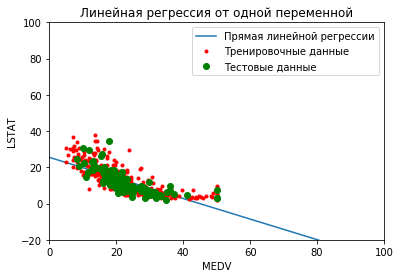

In [366]:
#Построим модель для двух переменных MEDV и LSTAT

#для библиотеки sklearn сделаем reshape(-1,1) и преобразуем Series данные в numpy array

MEDV = np.array(data.MEDV).reshape(-1,1)
LSTAT = np.array(data.LSTAT).reshape(-1,1)

#Линейная регрессия строится на том основании, что две переменные имеют линейную зависимость.
from sklearn.linear_model import LinearRegression
model = LinearRegression()

#Разделим на 80% тренировочных и на 20% тестовых
from sklearn.model_selection import train_test_split

x = MEDV
y = LSTAT
X_train, X_test, y_train, y_test = train_test_split(
    MEDV,
    LSTAT,
    test_size = 0.2
)

#Обучим модель с помощью fit() метода
model.fit(X_train, y_train)

#Посмотрим предсказания модели на тестируемых данных
predicted_y = model.predict(X_test)

#Посчитаем ошибку модели
print(f'Ошибка линейной регрессии: {round(model.score(X_test, y_test), 5)}')

#Построим график линейной регресии
plt.xlabel('MEDV')
plt.ylabel('LSTAT')
plt.title('Линейная регрессия от одной переменной')
# Построим прямую для регрессии
# Создадим 100 точек для предсказаний
x = np.linspace(-20, 100, 50)
# Посчитаем предсказанные значения
# y = kx + b
# k = model.coef_
# b = model.intercept_
y = model.coef_*x + model.intercept_
y = np.transpose(y)
plt.plot(x,y)
plt.plot(X_train, y_train, 'r.')
plt.plot(X_test, y_test, 'go')
plt.xlim(0,100)
plt.ylim(-20,100)
plt.legend(['Прямая линейной регрессии', 'Тренировочные данные', 'Тестовые данные'])
plt.show()

#### 4. Загрузить таблицу Happiness report. Посчитать матрицу ковариаций попарно.

In [49]:
url="http://yustiks.ru/dataset/world-happiness-report-2019.csv"
data=pd.read_csv(url)
data.head()

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy life\nexpectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0


In [50]:
#Расчет матрицы ковариаций попарно
round(data.cov(), 1)

,Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy life\nexpectancy
Ladder,2041.0,1100.8,995.9,1061.2,1657.4,1108.1,370.9,1008.9,1615.0,1613.4
SD of Ladder,1100.8,2041.0,173.7,1259.8,1219.5,512.4,506.9,797.8,1254.5,1208.0
Positive affect,995.9,173.7,2015.0,785.2,778.3,1373.8,405.3,715.1,586.1,647.9
Negative affect,1061.2,1259.8,785.2,2015.0,1253.1,866.9,309.2,681.5,1050.9,944.8
Social support,1657.4,1219.5,778.3,1253.1,2015.0,904.5,230.7,891.5,1509.3,1471.9
Freedom,1108.1,512.4,1373.8,866.9,904.5,2015.0,736.3,987.3,800.9,821.4
Corruption,370.9,506.9,405.3,309.2,230.7,736.3,1837.7,511.3,368.3,233.0
Generosity,1008.9,797.8,715.1,681.5,891.5,987.3,511.3,2015.0,949.0,836.3
Log of GDP\nper capita,1615.0,1254.5,586.1,1050.9,1509.3,800.9,368.3,949.0,1938.0,1614.0
Healthy life\nexpectancy,1613.4,1208.0,647.9,944.8,1471.9,821.4,233.0,836.3,1614.0,1887.5


#### 5. Сколько в данной таблице отсутствующих значений? Написать ответ. Если есть отсутствующие значения в выборке country, убрать (drop).

#### 6. Сколько стран в выборке? Написать ответ.

#### 7. Построить матрицу корреляций для таблицы. Какие можно сделать выводы?


Отсутствующие значения в таблице ВСЕГО:  23

Отсутствующие значения в разбивке по группам: 
Country (region)            0
Ladder                      0
SD of Ladder                0
Positive affect             1
Negative affect             1
Social support              1
Freedom                     1
Corruption                  8
Generosity                  1
Log of GDP\nper capita      4
Healthy life\nexpectancy    6
dtype: int64

В выборке "Country (region)" нет отсутствующих значений.

Количество стран в таблице:  156

МАТРИЦА КОРРЕЛЯЦИЙ


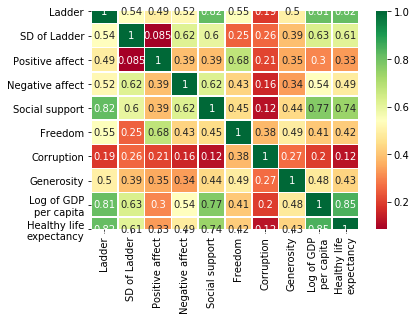

In [54]:
#Посчитаем количество отсутствующих значений в таблице

print('Отсутствующие значения в таблице ВСЕГО: ', data.isnull().sum().sum())
print('\nОтсутствующие значения в разбивке по группам: ')
print(data.isnull().sum())

if data['Country (region)'].isnull().sum() == 0:
    print('\nВ выборке "Country (region)" нет отсутствующих значений.')
else:
    print('Отсутствующие значения в выборке "Country (region)": ',  data['Country (region)'].isnull().sum())
    data = data.dropna(subset=['Country (region)'])

#Посчитаем количество стран в таблице
print('\nКоличество стран в таблице: ', len(data['Country (region)'].unique()))

#Построим матрицу корреляций для таблицы
print('\nМАТРИЦА КОРРЕЛЯЦИЙ')
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0,1))
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.5)

fig.set_size_inches(15, 15)
plt.show()


### Дискретное распределение случайной величины

#### 1. Напишите код для моделирования 10 подбрасываний игрального кубика. Начертите диаграму histogram. Какое это распределение?


Text(0.5, 1.0, 'Подбрасывание кубика 10 раз')

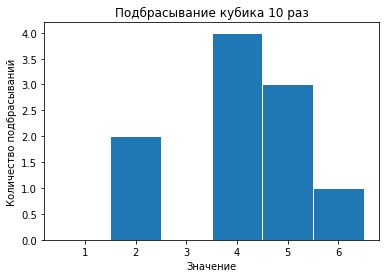

In [33]:
# Количество подбрасываний
number_of_randoms = 10 

# Массив значений
values = np.random.randint(1, 7, size=number_of_randoms)
plt.hist(values, bins=[0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5], edgecolor='white')

plt.xlabel('Значение')
plt.ylabel('Количество подбрасываний')
plt.title('Подбрасывание кубика ' + str(number_of_randoms) + ' раз')

Данное распределение является равномерным.

#### 2. Смоделируйте 1000 раз сумму по 100 подбрасываний. Начертите диаграму histogram. Почему график изменился? Почему можно применить центральную предельную теорему?

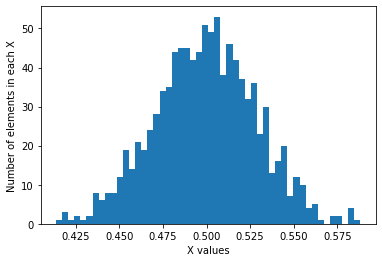

In [36]:
# Количество подбрасываний и суммирований
number_of_randoms = 100
number_of_sums = 1000
X1 = np.zeros([number_of_sums])

#  Суммируем все элементы равномерных выборок
for i in range(number_of_sums):
    X1[i] = np.sum(np.random.rand(number_of_randoms))/number_of_randoms
    
plt.hist(X1, 50)
plt.xlabel('X values')
plt.ylabel('Number of elements in each X')
plt.show()

Суммы элементов элементов выборок стремятся к нормальному распределению.

В данном случае можно применить ЦПТ, поскольку она утверждает, что сумма достаточно большого количества слабо зависимых случайных величин, имеющих примерно одинаковые масштабы (ни одно из слагаемых не доминирует, не вносит в сумму определяющего вклада), имеет распределение, близкое к нормальному. 